In [89]:
#1. The data file contains information from UCR students in CS105 and CS111.
#The data used in this lab willl be from the average commute time of students and their stress levels.
#
#2. From the data, we would like to know whether there is a correlation with the 
#stress levels of students and their average roundtrip commute time. If so,
#what is that correlation?

In [90]:
#3 Compute differing data distributions into visuals
import pandas as pd
import numpy as np

df = pd.read_csv("survey.csv")

<AxesSubplot:xlabel='commute'>

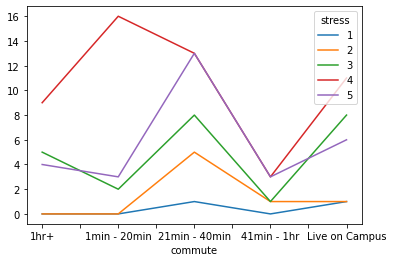

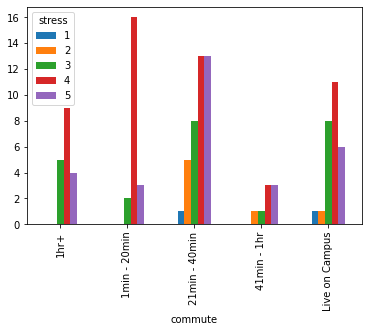

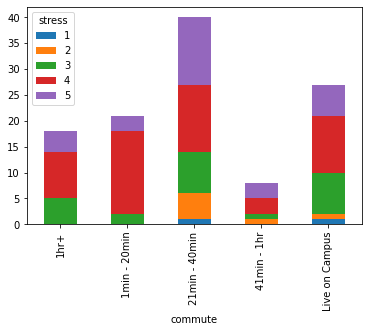

In [91]:
df
df['stress']= df.filter(items = ['Rate your stress levels this quarter. 1 being not stressed, 5 being the most stressed.'])
df['commute']= df.filter(items = ['How many minutes on average is your roundtrip commute to school daily?.1'])
df = df.filter(items = ['commute', 'stress'])
commVstress = pd.crosstab(df.commute, df.stress)
commVstress.plot();
commVstress.plot.bar();
commVstress.plot.bar(stacked = True)

<AxesSubplot:xlabel='commute,stress'>

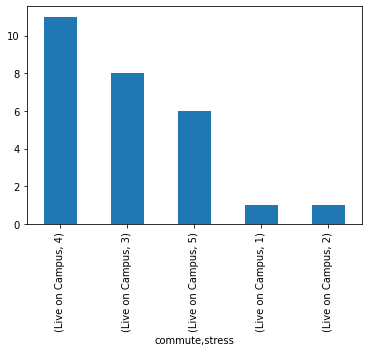

In [97]:
df0 = df.loc[df['commute'] == 'Live on Campus']
df0.value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='commute,stress'>

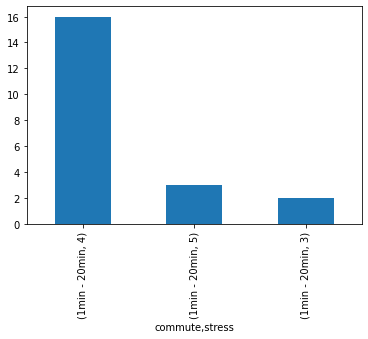

In [92]:
df1 = df.loc[df['commute'] == '1min - 20min']
df1.value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='commute,stress'>

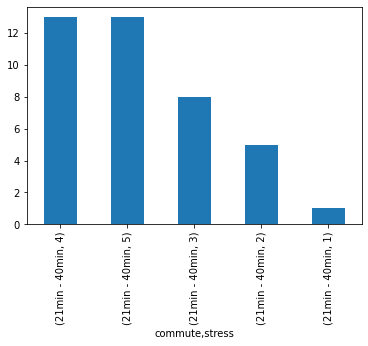

In [93]:
df2 = df.loc[df['commute'] == '21min - 40min']
df2.value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='commute,stress'>

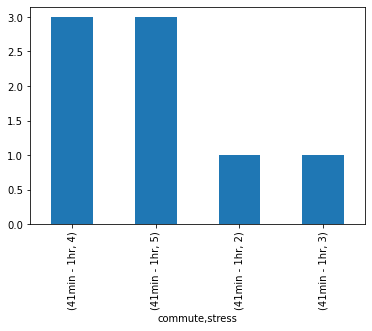

In [94]:
df3 = df.loc[df['commute'] == '41min - 1hr']
df3.value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='commute,stress'>

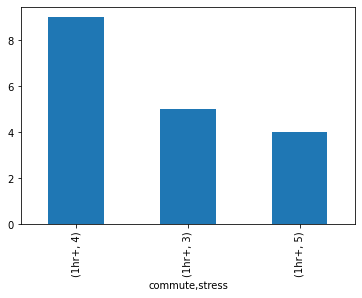

In [95]:
df4 = df.loc[df['commute'] == '1hr+']
df4.value_counts().plot(kind = 'bar')